## Import packages

In [1]:
import glam
import pandas as pd
import numpy as np
import os.path

/Users/pradyumna/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import matplotlib.pyplot as plt

from scipy.stats import invgauss

import seaborn as sns
import matplotlib.pyplot as plt
#plt.switch_backend('agg')

from scipy import stats

#import warnings
#warnings.filterwarnings('ignore')

In [3]:
np.random.seed(23) # from random.org

In [65]:
# For rpy2

import rpy2

%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice

# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [69]:
%%R
library(lme4)
library(car)
library(optimx)
library(ggplot2)
library(MASS)
library(pbkrtest)
library(broom)
library(dplyr)
library(dplyr)
library(reshape2)
library(arm)
library(multcomp)
library(graphics)

## Load data and GLAM structure 
Used binned data for simulation.

In [4]:
data = pd.read_csv(str('data/FF2018_data/GlamDataFF2018_Like_Bin_v2.csv'))
# Subset only necessary columns
data = data[['subject', 'trial', 'choice', 'rt',
         'item_value_0', 'item_value_1',
         'gaze_0', 'gaze_1']]

In [57]:
# Load data for FF2018 study 
data_all = pd.read_csv('data/FF2018_data/FFAllData_Like.csv')
data_all = data_all.drop(['Unnamed: 0'], axis=1)


## Load parameter estimates for participants

Use the parameter estimates from GLAM fit for Like, Binned data

In [16]:
sufix = '_Like_FixBin5'
glam_full = glam.GLAM(data)
glam_full.estimates = np.load(str('results/estimates/glam_FF2018_full_hierarchical_cv'+sufix+'.npy'))
glam_full.estimates = pd.DataFrame.from_dict(glam_full.estimates.item(0))
params_part = glam_full.estimates

In [17]:
params_part

,SNR,SNR_mu,SNR_sd,b,gamma,gamma_mu,gamma_sd,p_error,s,t0,tau,tau_mu,tau_sd,v,v_mu,v_sd
0,185.37,163.26,31.44,1.0,-0.45,-0.51,0.35,0.05,0.008199,0.0,2.19,1.73,0.99,0.000044,0.000052,0.000011
1,168.78,163.26,31.44,1.0,-0.08,-0.51,0.35,0.05,0.010155,0.0,1.77,1.73,0.99,0.000063,0.000052,0.000011
2,147.59,163.26,31.44,1.0,0.38,-0.51,0.35,0.05,0.008840,0.0,2.43,1.73,0.99,0.000056,0.000052,0.000011
3,169.79,163.26,31.44,1.0,-0.59,-0.51,0.35,0.05,0.006967,0.0,2.40,1.73,0.99,0.000041,0.000052,0.000011
4,102.31,163.26,31.44,1.0,-0.61,-0.51,0.35,0.05,0.007075,0.0,3.88,1.73,0.99,0.000066,0.000052,0.000011
5,125.34,163.26,31.44,1.0,-0.29,-0.51,0.35,0.05,0.008380,0.0,0.33,1.73,0.99,0.000062,0.000052,0.000011
6,160.60,163.26,31.44,1.0,-0.63,-0.51,0.35,0.05,0.011196,0.0,0.82,1.73,0.99,0.000067,0.000052,0.000011
7,171.68,163.26,31.44,1.0,-0.48,-0.51,0.35,0.05,0.007631,0.0,1.39,1.73,0.99,0.000043,0.000052,0.000011
8,197.25,163.26,31.44,1.0,-0.97,-0.51,0.35,0.05,0.010153,0.0,1.06,1.73,0.99,0.000054,0.000052,0.000011
9,185.06,163.26,31.44,1.0,-0.48,-0.51,0.35,0.05,0.009120,0.0,1.73,1.73,0.99,0.000044,0.000052,0.000011


## Define some parameters for the simulations


In [8]:
# Parameters for the simulations
boundary=1
error_weight=0.05

# Select subject number for the test (i.e. to extract min and max RT)
subject = 0

## Run drift simulations for selected values and parameters

In [ ]:
n_repeats = 2

In [56]:
# We will assume that every single pair in test will have a gaze_test pair assigned. Therefore
# len(value_tests) = len(gaze_tests) 
      
# Using median participant parameters for testing drift

# repeat for all the 'i' participants
#

AbsDEvid = []

#for i in ([0, 1, 2, 3]):    
for i in (data['subject'].unique()):    
    PartData = data.loc[data['subject'] == i]
    value_tests =np.column_stack((PartData['gaze_0'].values,PartData['gaze_1'].values))
    gaze_tests =np.column_stack((PartData['gaze_0'].values,PartData['gaze_1'].values))

    gamma = params_part['gamma'][i]
    tau = params_part['tau'][i]
    v = params_part['v'][i]
    s = params_part['s'][i]
    t0 = 0
    parameters = [v , gamma, s, tau, t0]
    ## error_range given by the reaction time values for an individual participant
    rt_min = glam_full.data['rt'][glam_full.data['subject'] == subject].values.min()
    rt_max = glam_full.data['rt'][glam_full.data['subject'] == subject].values.max()
    error_range = (rt_min, rt_max)

    Dev_a = balance_evidence(value_tests, gaze_tests, parameters,boundary, error_weight, error_range,n_repeats)

    for  j in range(len(Dev_a)):    
        AbsDEvid.append(Dev_a[j])
    print ("subj " + str(i))
    

subj 0
subj 1
subj 2
subj 3
subj 4
subj 5
subj 6
subj 7
subj 8
subj 9
subj 10
subj 11
subj 12
subj 13
subj 14
subj 15
subj 16
subj 17
subj 18
subj 19
subj 20
subj 21
subj 22
subj 23
subj 24
subj 25
subj 26
subj 27
subj 28
subj 29
subj 30
subj 31
subj 32


In [51]:
def balance_evidence(value_tests, gaze_tests, parameters,boundary, error_weight, error_range,n_repeats):
    
    mean_rts_trials = np.zeros((value_tests.shape[0])) * np.nan
    choice_trials = np.zeros((value_tests.shape[0])) * np.nan
    DEv_trials = np.zeros((value_tests.shape[0])) * np.nan
    AbsDEv_trials = np.zeros((value_tests.shape[0])) * np.nan
    Ev_drifts_0_trials  = []
    Ev_drifts_1_trials = []

    n_trials, n_items = value_tests.shape

    running_idx_value = 0
    #we iterate for all the combinations of trials + gaze
    for trial in range(n_trials):
        
            # intialize the drifts
            evidence_drifts_0 = []
            evidence_drifts_1 = []

            #define value and gaze values for this particular trial
            value_trial =value_tests[trial]
            gaze_trial =gaze_tests[trial]
            
            Sim_value = value_trial
            Sim_gaze = gaze_trial
            
            Delta_E = np.zeros(n_repeats) * np.nan            
            AbsDelta_E = np.zeros(n_repeats) * np.nan
            rts = np.zeros(n_repeats) * np.nan
            choices = np.zeros(n_repeats) * np.nan
            trial_idx = np.zeros(n_repeats) * np.nan
            repeat_idx = np.zeros(n_repeats) * np.nan
            running_idx = 0
        
            for repeat in range(n_repeats):
                    

                    
                    Evi_0, Evi_1, choice, rt = glam.driftSim.simulate_trial_drift(parameters, value_trial, gaze_trial,
                                                boundary=boundary,
                                                error_weight=error_weight,
                                                error_range=error_range)
                    
                    Delta_E[running_idx] = Evi_0[-1] - Evi_1[-1]
                    AbsDelta_E[running_idx] = abs(Evi_0[-1] - Evi_1[-1])                        
                    rts[running_idx] = rt
                    choices[running_idx] = choice
                    trial_idx[running_idx] = trial
                    repeat_idx[running_idx] = repeat
                    # Add a new sequence of drift for this particular trial
                    evidence_drifts_0.append(Evi_0)
                    evidence_drifts_1.append(Evi_1)
                    
                    running_idx += 1
                    
               
            # Add the mean value for this parameters interation               
            mean_rts_trials [running_idx_value] = rts.mean()
            choice_trials [running_idx_value]= choices.mean() 
            DEv_trials [running_idx_value] = Delta_E.mean()
            AbsDEv_trials [running_idx_value]= AbsDelta_E.mean()
            Ev_drifts_0_trials.append(evidence_drifts_0)
            Ev_drifts_1_trials.append(evidence_drifts_1)
 
            running_idx_value += 1 

    return AbsDEv_trials

## Calculate z-score

In [119]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]) 
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

    
        z_matrix_aux= pX_zA.values
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

In [120]:
zs1 = z_score1(data_all,'Part','AbsDEv')

In [103]:
z_matrix=[]
z_matrix_aux=[]

for i in (data_all['Part'].unique()):
    Choicedata = data_all.loc[data_all['Part'] == i]    
    
    pX_AbsDEv = pd.to_numeric(Choicedata["AbsDEv"]) 
    pX_zAbsDEv = (pX_AbsDEv - np.mean(pX_AbsDEv))/np.std(pX_AbsDEv)

    
    #z_matrix_aux= np.column_stack((pX_zAbsDEv))
    z_matrix_aux= pX_zAbsDEv.values
    
    for  j in range(len(z_matrix_aux)):    
        z_matrix.append(z_matrix_aux[j])
# Add to aggregate table
data_all["zAbsDEv"] = z_matrix
#aggregate_trial = np.column_stack((data1,z_matrix))
#data2 = pd.DataFrame(aggregate_trial,columns=["subject","trial","rt","choice","item_value_0","item_value_1","gaze_0","gaze_1","gamma","abs_evid_0","abs_evid_1","R0_star","R1_star","R0","R1","R0_glam","R1_glam","DA","DR","DR_glam","DV","AbsDV","DG","correct","z_rt","z_DA","z_DR","z_DR_glam","z_DV","z_DG"])


In [61]:
data_all["AbsDEv"] = AbsDEvid

In [115]:
data_all

,Unnamed: 0,Part,TrialN,PairID,LItem,LVal,RItem,RVal,Choice,RT,...,zRFam,zLValConfBDM,zLFamConfBDM,zRValConfBDM,zRFamConfBDM,ConfSplit,GSFSplit,DDTSplit,AbsDEv,zAbsDEv
0,40,1,41,57,40_nestle_rolo.png,1.10,48_mentos_mint.png,0.95,0,2009,...,-0.149629,-0.539889,-1.255416,-0.122804,-0.535705,1,0,0,1.206038,2.379017
1,41,1,42,41,11_lindt_orange.png,2.00,59_crunchie.png,1.70,0,3371,...,0.852603,0.294282,0.903717,-0.122804,0.903717,1,1,0,0.302686,-1.196779
2,42,1,43,11,18_galaxy_bar.png,1.10,32_snickers.png,2.30,1,1700,...,0.852603,0.294282,1.383045,0.711367,0.184006,1,0,1,0.401947,-0.803867
3,43,1,44,60,57_food_doctor_mild_korma_crisps.png,1.25,110_bombay_mix.png,1.40,1,7466,...,-0.149629,-1.374061,-0.535705,-0.956975,-1.975128,0,1,0,0.432979,-0.681031
4,44,1,45,5,113_walkers_cheese.png,2.00,32_snickers.png,2.30,1,1889,...,0.852603,0.711367,-0.535705,0.711367,0.184006,0,0,1,0.813133,0.823755
5,45,1,46,3,108_chilli_nuts.png,1.70,41_jelly_babies_berry_mix.png,1.85,1,2227,...,0.556168,-0.122804,-1.255416,-0.122804,-1.975128,0,0,1,0.502701,-0.405044
6,46,1,47,46,112_lindt_extra_creamy.png,1.85,104_graze_sriracha.png,0.65,0,4259,...,-2.443470,0.294282,-1.255416,-0.122804,-1.255416,0,1,1,0.653925,0.193553
7,47,1,48,52,42_dairy_milk_fruit_and_nut.png,1.55,38_milkybar.png,0.80,0,3505,...,0.379719,0.711367,0.184006,0.294282,0.903717,0,1,0,0.408924,-0.776249
8,48,1,49,59,54_milkyway_magic_stars.png,1.55,30_starburst_original.png,1.10,0,2548,...,0.732617,0.294282,1.383045,0.294282,0.184006,1,1,1,0.965214,1.425747
9,49,1,50,8,115_shapers_blueberry.png,1.10,43_mccoys_steak_crisps.png,2.00,1,3226,...,0.852603,-0.122804,-1.255416,0.711367,1.383045,0,1,0,0.807045,0.799658


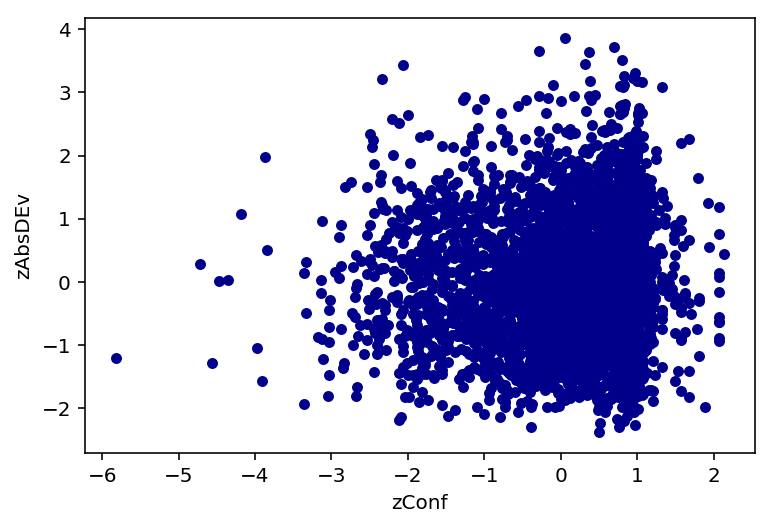

In [105]:
ax1 = data_all.plot.scatter(x='zConf', y='zAbsDEv',c='DarkBlue')
plt.show()

In [107]:
data_all['zConf'].corr(data_all['zAbsDEv'])

0.009960072791472128

In [108]:
%%R -i data_all
d <- data_all

BIC: 10872.68
Call:  glm(formula = zConf ~ zAbsDEv, data = d)

Coefficients:
(Intercept)      zAbsDEv  
   0.098366     0.009482  

Degrees of Freedom: 3959 Total (i.e. Null);  3958 Residual
Null Deviance:	    3589 
Residual Deviance: 3588 	AIC: 10850


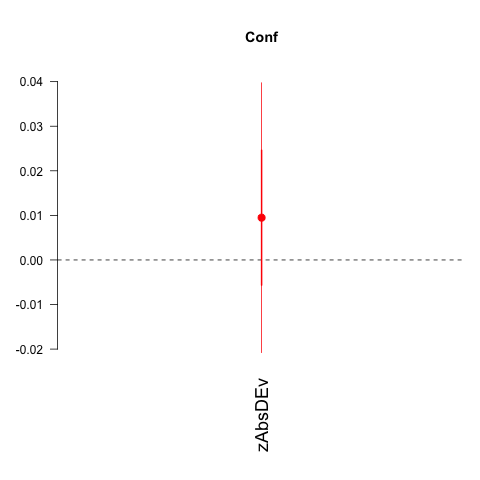

In [110]:
%%R    
title_plot = "Conf"
ModelChoice_1 <- glm(zConf ~ zAbsDEv  , data= d)
coefplot(ModelChoice_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1),main=title_plot)
#legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)
BIC1choice = BIC(ModelChoice_1)
cat("BIC:" , BIC1choice)
ModelChoice_1

## [END]

In [15]:
plt.subplot(121)        
plt.plot(param_tests[param_select], mean_rts_params[0] , marker='o', markersize=5, color="red");
plt.plot(param_tests[param_select], mean_rts_params[1] , marker='o', markersize=5, color="blue");
plt.plot(param_tests[param_select], mean_rts_params[2] , marker='o', markersize=5, color="green
plt.title("RT across parameters."+ "Parameter:  " + parameters_names[param_select]);
plt.ylabel('Reaction Time');
plt.xlabel('Parameter ' + parameters_names[param_select] );
plt.legend((str(value_tests[0]), str(value_tests[1]),str(value_tests[2])),loc='upper right', title = 'Value items');
plt.subplot(122)
plt.plot(param_tests[param_select], choice_params[0] , marker='o', markersize=5, color="red");
plt.plot(param_tests[param_select], choice_params[1] , marker='o', markersize=5, color="blue");
plt.plot(param_tests[param_select], choice_params[2] , marker='o', markersize=5, color="green");
plt.title("Proportion of right answers across params."+ "Parameter: " + parameters_names[param_select]);
plt.ylabel('Choice');
plt.xlabel('Parameter ' + parameters_names[param_select] );
plt.legend((str(value_tests[0]), str(value_tests[1]),str(value_tests[2])),loc='upper right', title = 'Value items');

SyntaxError: EOL while scanning string literal (<ipython-input-15-42df3e99f98e>, line 4)